In [1]:
import pandas as pd
import math
import keras
from keras.layers import Dense,Embedding, Flatten, Conv1D, GlobalMaxPooling1D, LSTM, Bidirectional, Dropout
from keras.preprocessing.text import text_to_word_sequence,Tokenizer
from keras.preprocessing.sequence import pad_sequences

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
df = pd.read_pickle("../cryptic_dataset/combined_fifteen_times_final_filtered.pickle").drop_duplicates()

In [23]:
anagram_df = df[
    df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [24]:
homophone_df = df[
    ~df.is_anagram &
    df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [25]:
double_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [26]:
cryptic_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [27]:
contain_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [28]:
reverse_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [29]:
alternate_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [30]:
init_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [31]:
delete_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [32]:
charade_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [33]:
lit_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [34]:
hidden_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    df.is_hidden & 
    ~df.is_spoonerism & 
    ~df.is_palindrome
]

In [35]:
spoonerism_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    df.is_spoonerism & 
    ~df.is_palindrome
]

In [36]:
palindrome_df = df[
    ~df.is_anagram &
    ~df.is_homophone &
    ~df.is_double &
    ~df.is_cryptic & 
    ~df.is_contain & 
    ~df.is_reverse & 
    ~df.is_alternate &
    ~df.is_init & 
    ~df.is_delete & 
    ~df.is_charade & 
    ~df['is_&lit'] & 
    ~df.is_hidden & 
    ~df.is_spoonerism & 
    df.is_palindrome
]

In [37]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.clue.tolist())

In [75]:
cc_types_dfs = [anagram_df,homophone_df,double_df,cryptic_df,contain_df,reverse_df,alternate_df,init_df,delete_df,lit_df,hidden_df,spoonerism_df,palindrome_df]

In [76]:
cc_types = 'is_anagram	is_homophone	is_double	is_cryptic	is_contain	is_reverse	is_alternate	is_init	is_delete	is_&lit	is_hidden	is_spoonerism	is_palindrome'.split('	')

In [77]:
for df,cc_type in zip(cc_types_dfs,cc_types):
    df['category'] = cc_type

In [78]:
def get_input_val_test(df):
    length = len(df)
    input_len = math.floor(length*0.7)
    val_len  = math.floor(length*0.2)
    test_len = math.floor(length*0.1)
    input_df = df[:input_len]
    val_df = df[input_len:input_len+val_len]
    test_df = df[input_len+val_len:]
    return input_df,val_df,test_df

In [79]:
input_cc_types_df = pd.concat([get_input_val_test(df)[0] for df in cc_types_dfs])
val_cc_types_df = pd.concat([get_input_val_test(df)[1] for df in cc_types_dfs])
test_cc_types_df = pd.concat([get_input_val_test(df)[2] for df in cc_types_dfs])

In [80]:
max_size = input_cc_types_df.groupby('category').count().max()[0]

In [81]:
lst = [input_cc_types_df]
for class_index, group in input_cc_types_df.groupby('category'):
    sample = group.sample(max_size-len(group), replace=True, )
    lst.append(sample)
upsampled_input_cc_types_df = pd.concat(lst)

In [82]:
len(upsampled_input_cc_types_df)

83135

In [83]:
len(val_cc_types_df)

6260

In [84]:
len(test_cc_types_df)

3144

In [85]:
len(pd.concat([val_cc_types_df,test_cc_types_df]))

9404

In [86]:
len(pd.concat([val_cc_types_df,test_cc_types_df]).drop_duplicates())

9404

In [87]:
import pickle

In [88]:
with open('upsampled_data_without_charades','wb') as f:
    pickle.dump([upsampled_input_cc_types_df,val_cc_types_df,test_cc_types_df],f)

In [58]:
upsampled_input_cc_types_df.sample(frac=1,random_state=133).to_csv("../upsampled_train_val_test/train.csv",index=False)

In [59]:
val_cc_types_df.sample(frac=1,random_state=133).to_csv("../upsampled_train_val_test/val.csv",index=False)

In [60]:
test_cc_types_df.sample(frac=1,random_state=133).to_csv("../upsampled_train_val_test/test.csv",index=False)

In [61]:
upsampled_input_cc_types_df = pd.read_csv("../upsampled_train_val_test/train.csv")

In [62]:
val_cc_types_df = pd.read_csv("../upsampled_train_val_test/val.csv")

In [63]:
test_cc_types_df = pd.read_csv("../upsampled_train_val_test/test.csv")

In [64]:
cc_input_df = upsampled_input_cc_types_df[['clue','category']]
cc_val_df = val_cc_types_df.drop_duplicates()[['clue','category']]
cc_test_df = test_cc_types_df.drop_duplicates()[['clue','category']]

In [95]:
cc_val_df.groupby('category').count()

,clue,fasttext_input
category,,
is_&lit,30,30
is_alternate,5,5
is_anagram,791,791
is_charade,1913,1913
is_contain,62,62
is_cryptic,252,252
is_delete,85,85
is_double,97,97
is_hidden,180,180


In [65]:
cc_input_df['clue'] = cc_input_df['clue'].apply(lambda x:' '.join(text_to_word_sequence(x)))
cc_val_df['clue'] = cc_val_df['clue'].apply(lambda x:' '.join(text_to_word_sequence(x)))
cc_test_df['clue'] = cc_test_df['clue'].apply(lambda x:' '.join(text_to_word_sequence(x)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
cc_input_df['fasttext_input'] = cc_input_df['category'].apply(lambda x:'__label__'+x+' ,').map(str)+cc_input_df['clue']
cc_val_df['fasttext_input'] = cc_val_df['category'].apply(lambda x:'__label__'+x+' ,').map(str)+cc_val_df['clue']
cc_test_df['fasttext_input'] = cc_test_df['category'].apply(lambda x:'__label__'+x+' ,').map(str)+cc_test_df['clue']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
import fasttext

In [68]:
cc_input_df['fasttext_input'].to_csv("cc_input_df_ft.txt",sep=' ',header=False, index=False)
cc_val_df['fasttext_input'].to_csv("cc_val_df_ft.txt",sep=' ',header=False, index=False)

In [69]:
model_5_epoch = fasttext.supervised('cc_input_df_ft.txt','model_5_epoch',epoch=5)

In [70]:
model_10_epoch = fasttext.supervised('cc_input_df_ft.txt','model_10_epoch',epoch=10)

In [71]:
model_20_epoch = fasttext.supervised('cc_input_df_ft.txt','model_20_epoch',epoch=20)

In [83]:
results = model_10_epoch.test('cc_val_df_ft.txt')

In [84]:
results.precision

0.44325593529872165

In [85]:
results.recall

0.44325593529872165

In [86]:
results.nexamples

3833

In [112]:
cc_types_dict = {k: v for v, k in enumerate(cc_types)}

In [96]:
val_pred = model_20_epoch.predict(cc_val_df['clue'])

In [115]:
val_pred = [cc_types_dict[pred[0]] for pred in val_pred]

In [117]:
val_out = [cc_types_dict[pred] for pred in cc_val_df['category'].tolist()]

In [121]:
from sklearn.metrics import confusion_matrix

In [122]:
cnf_matrix = confusion_matrix(val_out,val_pred)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[408  11   4  16  65  22   1   6  95 152   1  10   0   0]
 [  9 105   0   4   8   6   0   0  10  30   0   0   0   0]
 [ 21   2   2   8   7   2   1   2  13  33   0   6   0   0]
 [ 55   7   4  35  21   7   1   2  33  80   0   7   0   0]
 [  4   1   0   0  36   2   0   1   7  11   0   0   0   0]
 [ 13   0   0   1  16  53   0   0  14  18   0   0   0   0]
 [  0   0   0   1   0   0   4   0   0   0   0   0   0   0]
 [ 10   0   0   0  11   2   1   8  38  29   0   1   0   0]
 [ 10   0   0   0   9   3   1   2  31  27   0   1   0   1]
 [266  31   7  43 216 100   6  20 303 890   1  29   0   1]
 [  4   2   0   1   2   3   1   1   7   8   1   0   0   0]
 [ 26   1   2  10  32   9   0   0  29  31   0  40   0   0]
 [  1   0   0   0   0   0   0   0   0   1   0   0  20   0]
 [  1   0   0   0   2   3   0   0   0   1   0   0   0   2]]
Normalized confusion matrix
[[5.16e-01 1.39e-02 5.06e-03 2.02e-02 8.

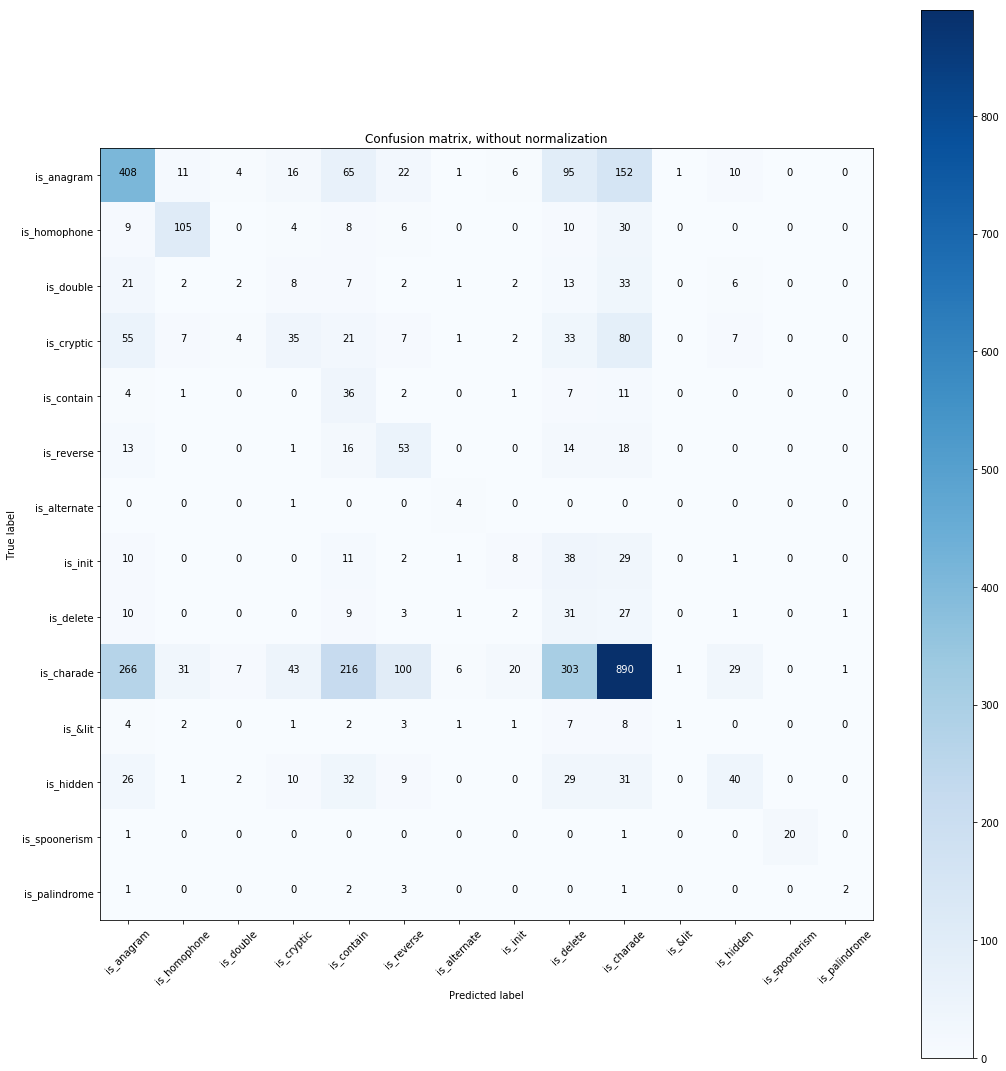

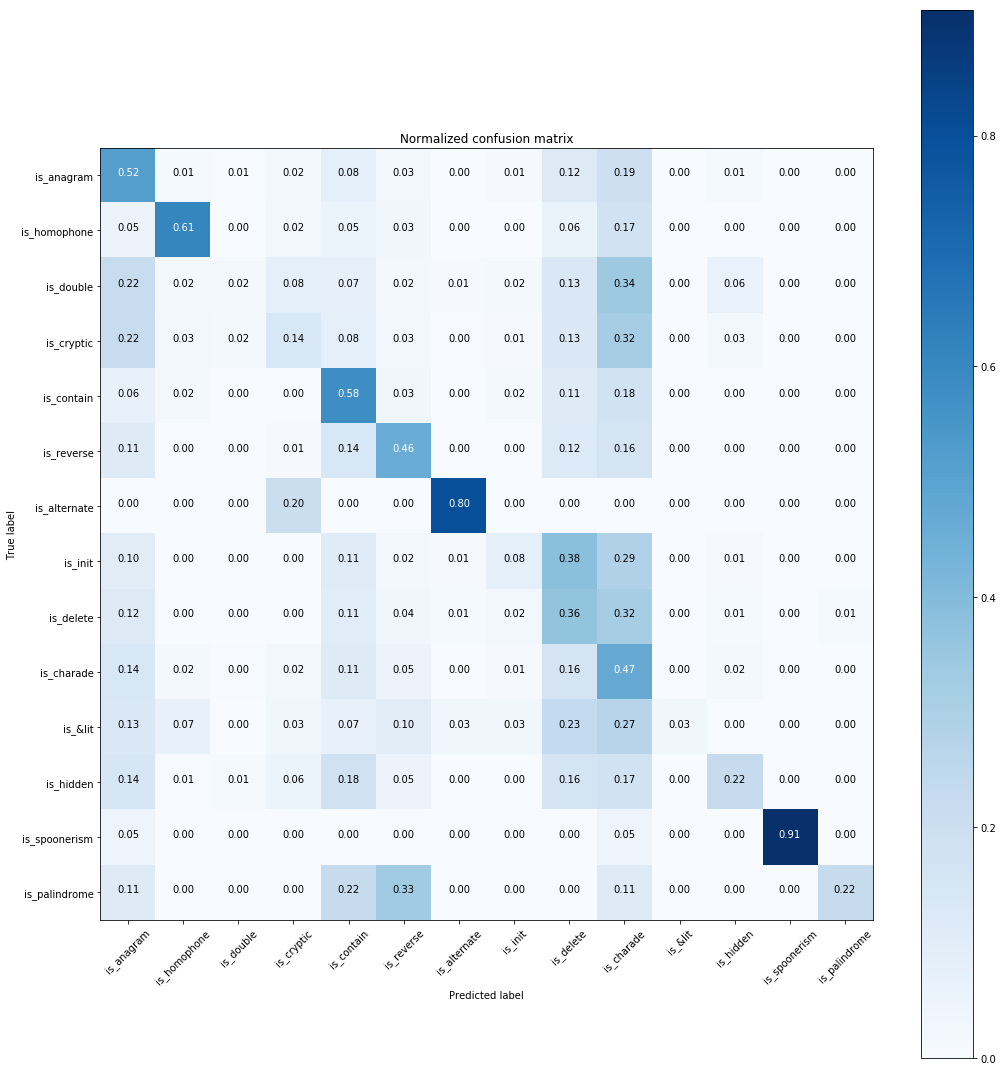

In [123]:
print(__doc__)

import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

matplotlib.matplotlib_fname()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
np.set_printoptions(precision=2)
class_names = cc_types
# Plot non-normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()